<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/Tellus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#海岸線の抽出

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pickle
import tifffile
from tqdm.auto import tqdm

## ITFF画像の可視化


In [3]:
!ls drive/My\ Drive/'The 4th Tellus Satellite Challenge'

evaluation_code.zip  sample_submit.json  train_annotations.zip
readme.txt	     test_images.zip	 train_images.zip


In [4]:
!unzip drive/My\ Drive/'The 4th Tellus Satellite Challenge'/train_images.zip

Archive:  drive/My Drive/The 4th Tellus Satellite Challenge/train_images.zip
   creating: train_images/
  inflating: train_images/train_00.tif  
  inflating: train_images/train_01.tif  
  inflating: train_images/train_02.tif  
  inflating: train_images/train_03.tif  
  inflating: train_images/train_04.tif  
  inflating: train_images/train_05.tif  
  inflating: train_images/train_06.tif  
  inflating: train_images/train_07.tif  
  inflating: train_images/train_08.tif  
  inflating: train_images/train_09.tif  
  inflating: train_images/train_10.tif  
  inflating: train_images/train_11.tif  
  inflating: train_images/train_12.tif  
  inflating: train_images/train_13.tif  
  inflating: train_images/train_14.tif  
  inflating: train_images/train_15.tif  
  inflating: train_images/train_16.tif  
  inflating: train_images/train_17.tif  
  inflating: train_images/train_18.tif  
  inflating: train_images/train_19.tif  
  inflating: train_images/train_20.tif  
  inflating: train_images/train_21.

In [5]:
!unzip drive/My\ Drive/'The 4th Tellus Satellite Challenge'/test_images.zip

Archive:  drive/My Drive/The 4th Tellus Satellite Challenge/test_images.zip
   creating: test_images/
  inflating: test_images/test_00.tif  
  inflating: test_images/test_01.tif  
  inflating: test_images/test_02.tif  
  inflating: test_images/test_03.tif  
  inflating: test_images/test_04.tif  
  inflating: test_images/test_05.tif  
  inflating: test_images/test_06.tif  
  inflating: test_images/test_07.tif  
  inflating: test_images/test_08.tif  
  inflating: test_images/test_09.tif  
  inflating: test_images/test_10.tif  
  inflating: test_images/test_11.tif  
  inflating: test_images/test_12.tif  
  inflating: test_images/test_13.tif  
  inflating: test_images/test_14.tif  
  inflating: test_images/test_15.tif  
  inflating: test_images/test_16.tif  
  inflating: test_images/test_17.tif  
  inflating: test_images/test_18.tif  
  inflating: test_images/test_19.tif  
  inflating: test_images/test_20.tif  
  inflating: test_images/test_21.tif  
  inflating: test_images/test_22.tif  
 

In [6]:
!unzip drive/My\ Drive/'The 4th Tellus Satellite Challenge'/train_annotations.zip

Archive:  drive/My Drive/The 4th Tellus Satellite Challenge/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_00.json  
  inflating: train_annotations/train_01.json  
  inflating: train_annotations/train_02.json  
  inflating: train_annotations/train_03.json  
  inflating: train_annotations/train_04.json  
  inflating: train_annotations/train_05.json  
  inflating: train_annotations/train_06.json  
  inflating: train_annotations/train_07.json  
  inflating: train_annotations/train_08.json  
  inflating: train_annotations/train_09.json  
  inflating: train_annotations/train_10.json  
  inflating: train_annotations/train_11.json  
  inflating: train_annotations/train_12.json  
  inflating: train_annotations/train_13.json  
  inflating: train_annotations/train_14.json  
  inflating: train_annotations/train_15.json  
  inflating: train_annotations/train_16.json  
  inflating: train_annotations/train_17.json  
  inflating: train_annotations/train_18.

In [7]:
!unzip drive/My\ Drive/'The 4th Tellus Satellite Challenge'/evaluation_code.zip 

Archive:  drive/My Drive/The 4th Tellus Satellite Challenge/evaluation_code.zip
   creating: evaluation_code/
  inflating: evaluation_code/evaluate.py  
  inflating: evaluation_code/readme.txt  


In [8]:
!ls

drive		 sample_data  train_annotations
evaluation_code  test_images  train_images


In [9]:
#データの読み込み
idx = 0
data = tifffile.imread(f'./train_images/train_{idx:02d}.tif')
with open(f"./train_annotations/train_{idx:02d}.json", "r") as fp:
    annotation = json.load(fp)

In [10]:
#データ型、サイズ
type(data), data.shape

(numpy.ndarray, (2914, 5925))

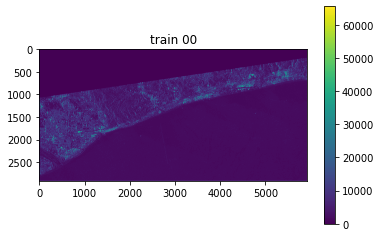

In [11]:
# プロット
plt.title(f"train {idx:02d}")
plt.imshow(data)
plt.colorbar()
plt.show()

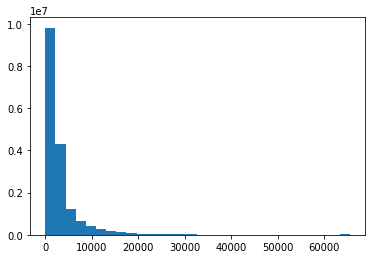

In [12]:
#輝度のヒストグラム
plt.hist(data.flatten(), bins=30)
plt.show()

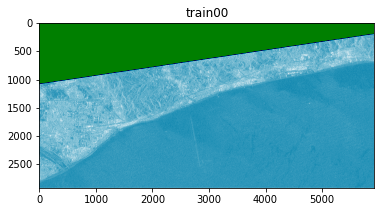

In [13]:
#ログスケールでの可視化
plt.title(f"train{idx:02d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
plt.show()

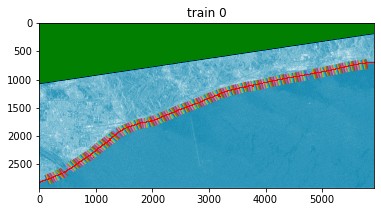

In [14]:
#アノテーションデータのプロット
plt.title(f"train{idx:０２d}")
plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
for line in annotation['validate_lines']:
    ix = [line[i][0] for i in range(2)]
    iy = [line[i][1] for i in range(2)]
    plt.plot(ix, iy)
for point in annotation['coastline_points']:
    plt.plot(point[0], point[1], ",", color="red")
plt.show()

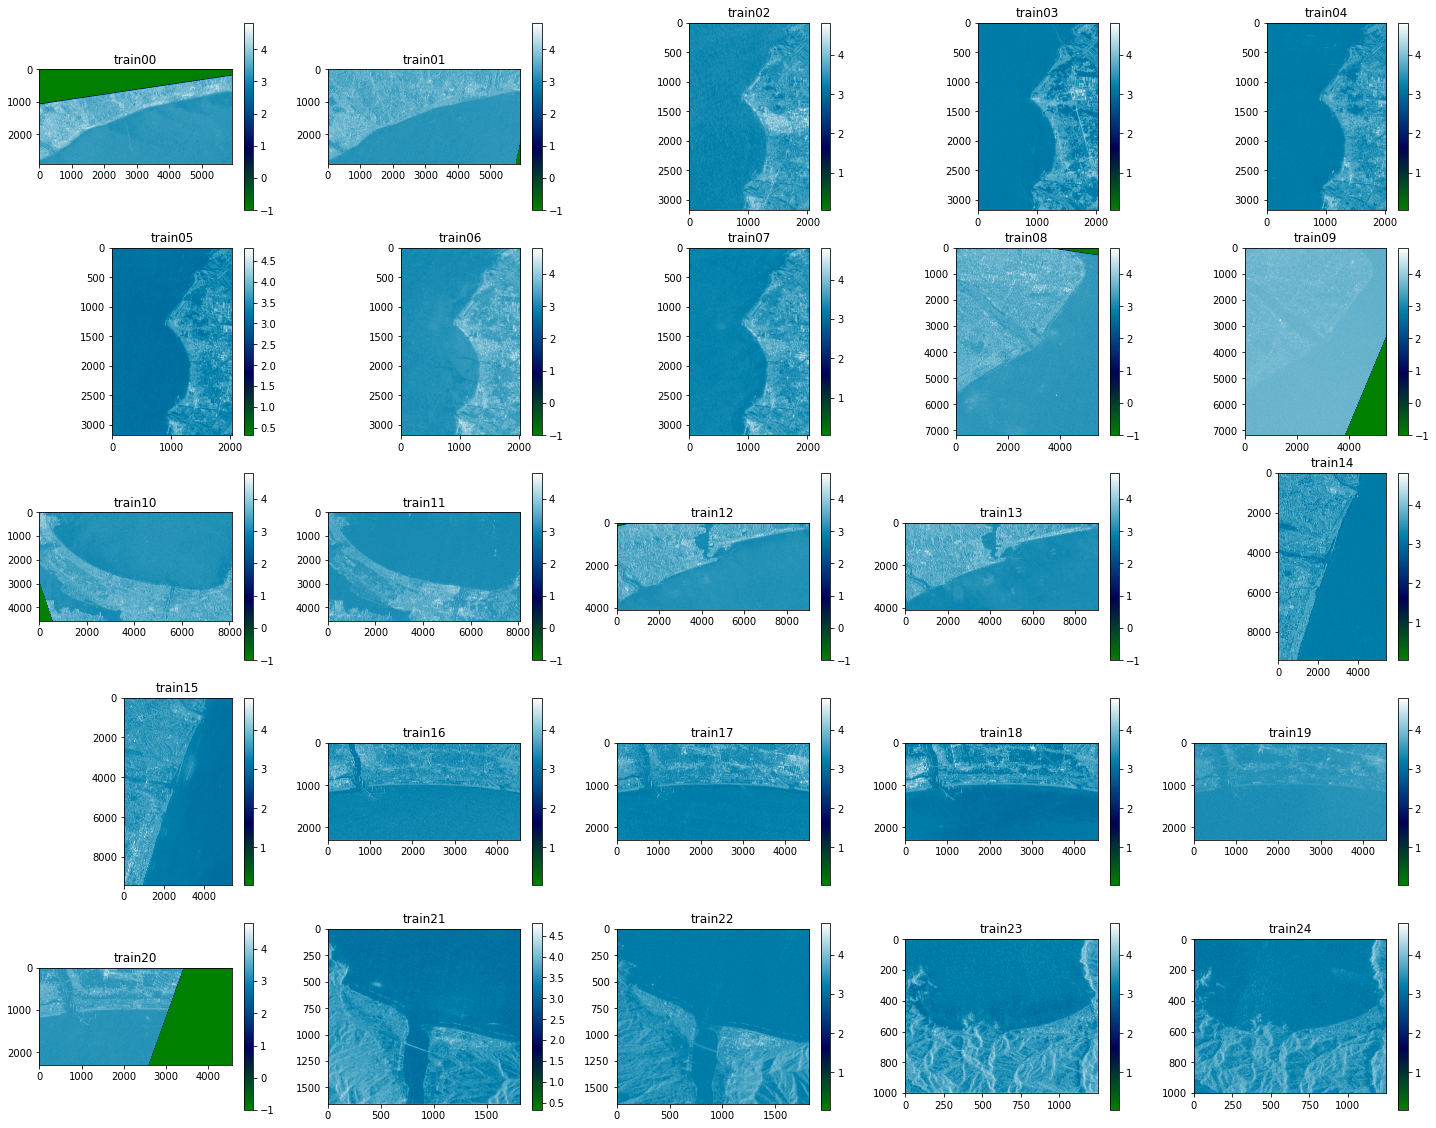

In [15]:
#trainデータ全体の可視化
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.title(f"train{idx:02d}")
    data = tifffile.imread(f'/content/train_images/train_{idx:02d}.tif')
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    plt.colorbar()
plt.savefig("/content/drive/My Drive/img.png")
plt.show()


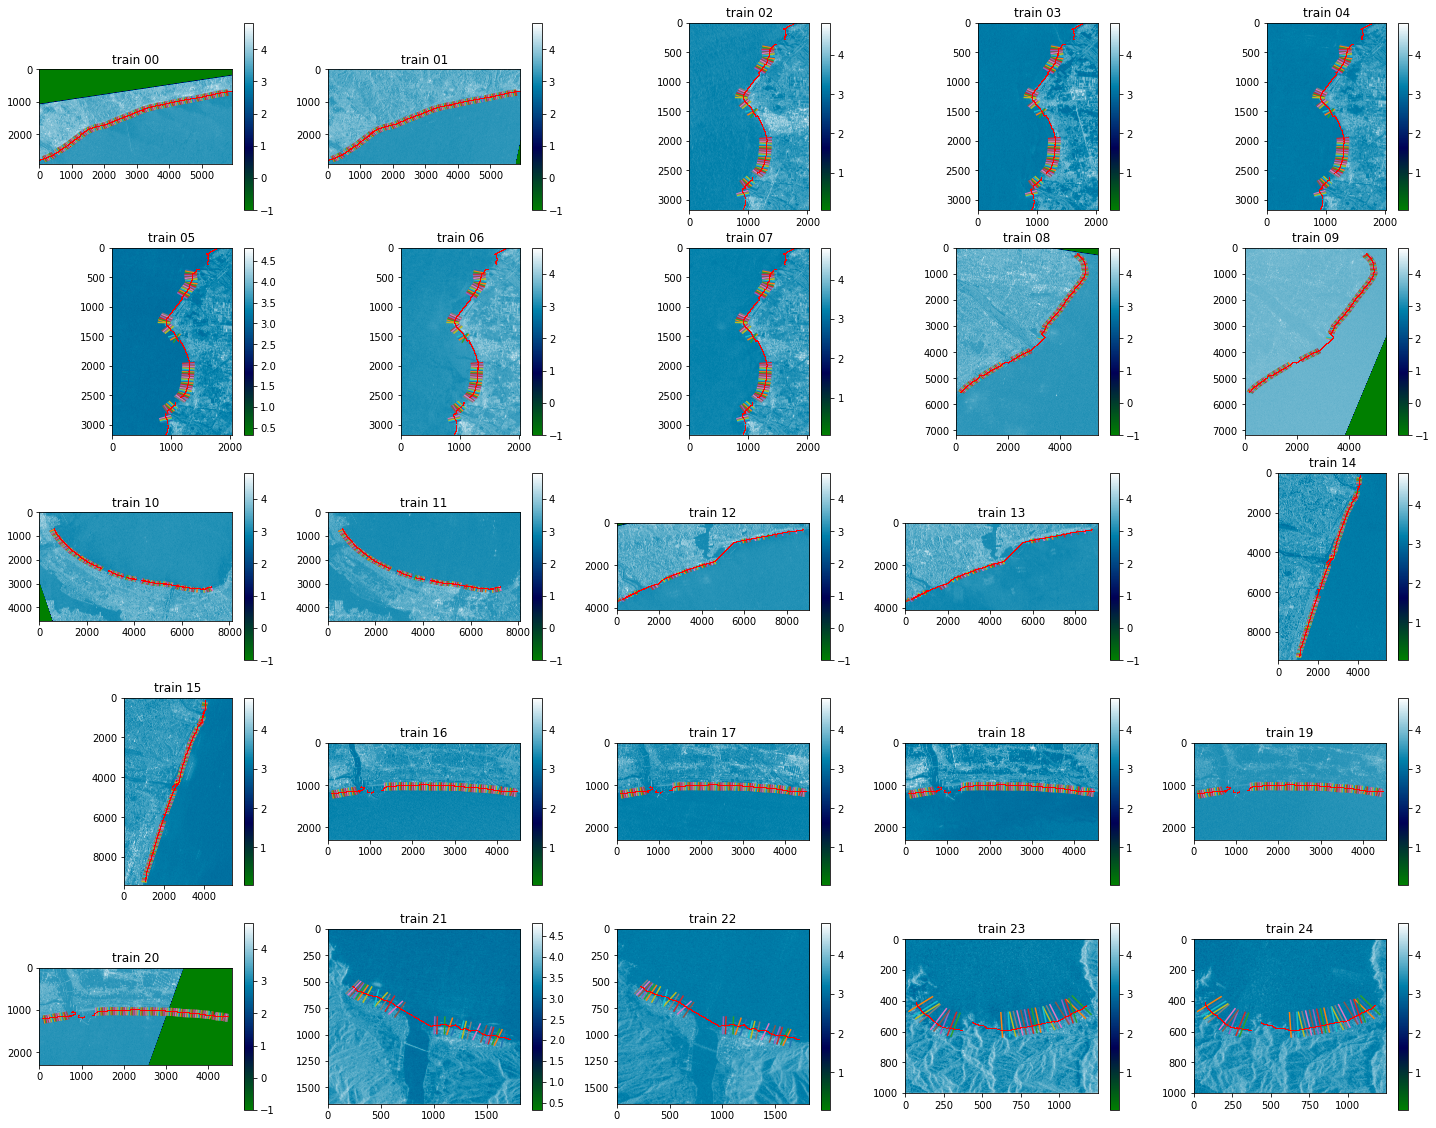

In [16]:
#trainデータの全体のアノテーション
plt.figure(figsize=(5*5, 5*4))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.title(f"train {idx:02d}")
    data = tifffile.imread(f'/content/train_images/train_{idx:02d}.tif')
    with open(f"/content/train_annotations/train_{idx:02d}.json", "r") as fp:annotation=json.load(fp)
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    for line in annotation['validate_lines']:
        ix = [line[i][0] for i in range(2)]
        iy = [line[i][1] for i in range(2)]
        plt.plot(ix, iy)
    for point in annotation['coastline_points']:
        plt.plot(point[0], point[1], ",", color="red")
    plt.colorbar()
plt.savefig("/content/drive/My Drive/img_w_annotation.png")
plt.show()


In [ ]:
#testデータ全体の可視化
plt.figure(figsize=(5*5, 6*4))
for idx in range(30):
    plt.subplot(6, 5, idx+1)
    plt.title(f"test{idx:02d}")
    data = tifffile.imread(f'/content/test_images/test_{idx:02d}.tif')
    plt.imshow(np.log10(data + 1.0e-1), cmap="ocean")
    plt.colorbar()
plt.savefig("/content/drive/My Drive/test_image.png")
plt.show()